# Heart Attack 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.


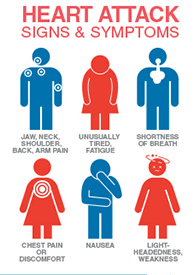



<a id = '1' ></a>
## Python Libraries
* In this section, we import used libraries during this kernel.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
#save our model using pickle
import pickle as pkl
# Scaling
from sklearn.preprocessing import RobustScaler
# Train Test Split
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


<a id = '2' ></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
    * **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id = '3' ></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [2]:
# read data 
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id = '4' ></a>
## Missing Value Analysis

In [6]:
# missing value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id = '5' ></a>
## Unique Value Analysis

In [7]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id = '6' ></a>
## Investigate categorical features


In [8]:
# Renaming columns
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate',
       'ExerciseInducedAngina', 'PreviousPeak', 'Slope', 'MajorBloodVessels', 'ThalRate', 'ProbHA']

categoricals = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'Slope', 'ThalRate','ProbHA']
numericals = [i for i in df.columns if i not in categoricals]

In [9]:
for col in df[categoricals]:
    print(f'We have {len(df[col].unique())} unique values in --{col}-- column: {df[col].unique()}')

We have 2 unique values in --Sex-- column: [1 0]
We have 4 unique values in --ChestPainType-- column: [3 2 1 0]
We have 2 unique values in --FastingBloodSugar-- column: [1 0]
We have 3 unique values in --RestingECG-- column: [0 1 2]
We have 2 unique values in --ExerciseInducedAngina-- column: [0 1]
We have 3 unique values in --Slope-- column: [0 2 1]
We have 4 unique values in --ThalRate-- column: [1 2 3 0]
We have 2 unique values in --ProbHA-- column: [1 0]


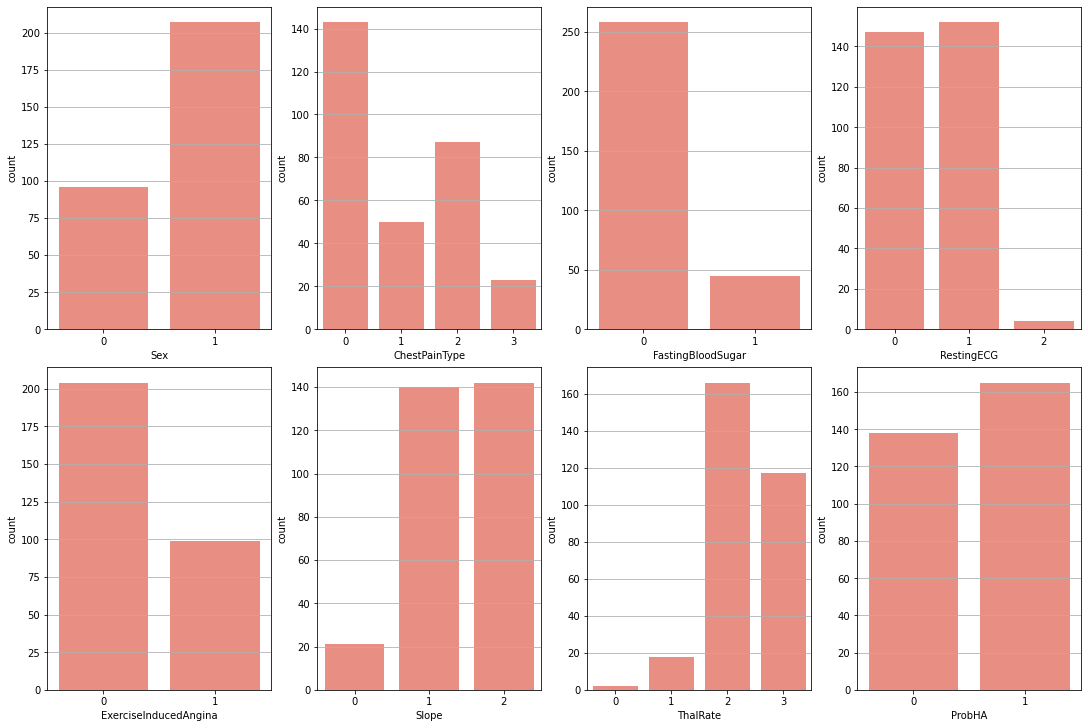

In [10]:
# Count plots for categorical features
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
for i in df[categoricals]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=df, x=i, color = 'salmon')
    plt.grid(axis='y')
    x+=1

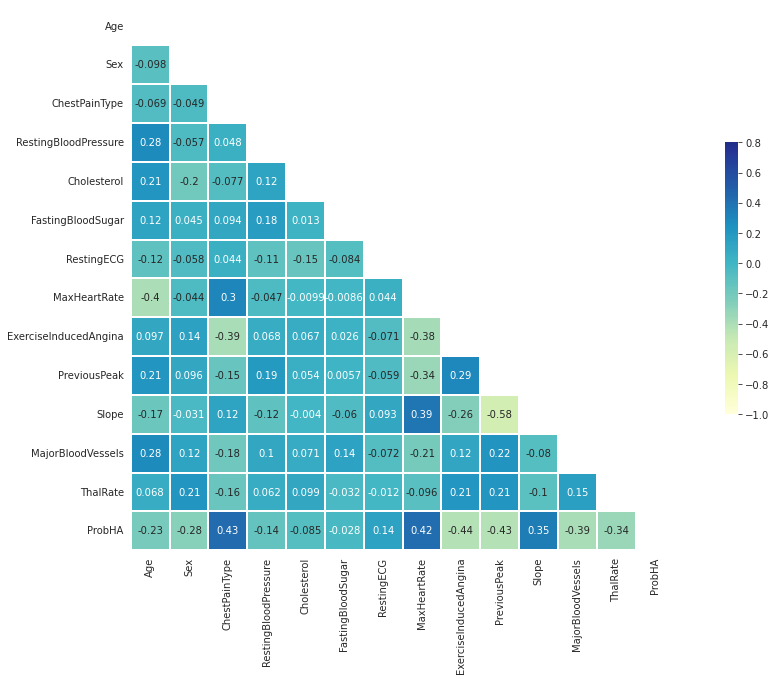

In [11]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, cmap='YlGnBu', annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02)

## Box Plot Analysis

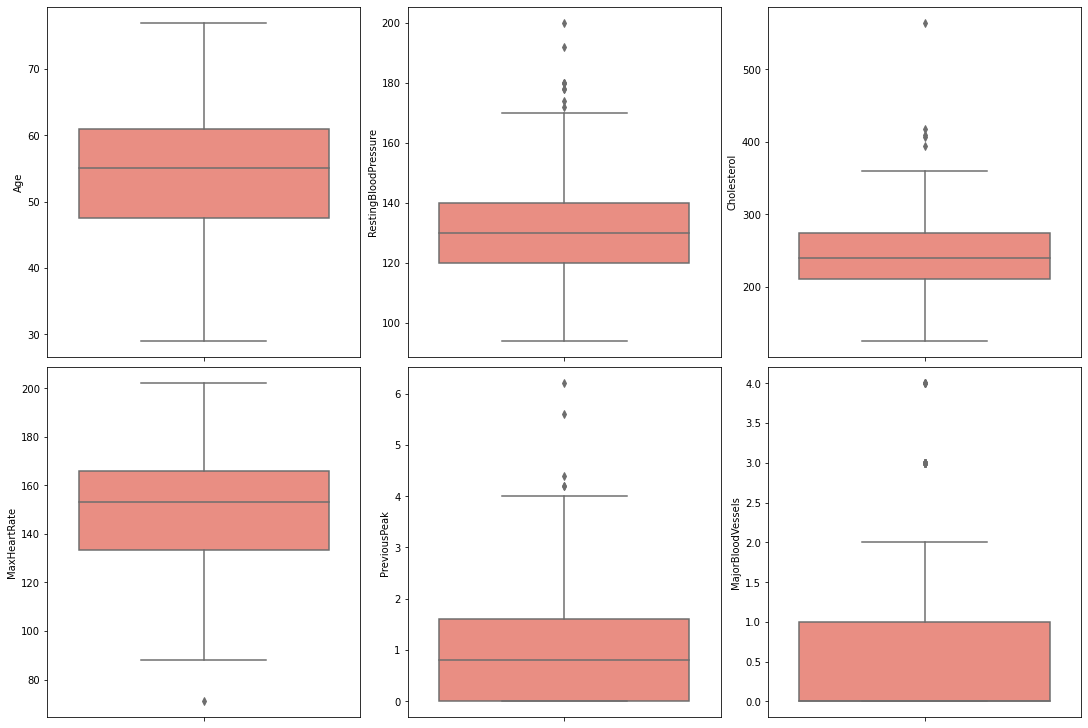

In [12]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
for i in df[numericals]:
    ax = plt.subplot(231+x)
    ax = sns.boxplot(data=df, y=i, color = 'salmon')
    x+=1

## Exploratory Data Analysis (EDA)


1    165
0    138
Name: ProbHA, dtype: int64


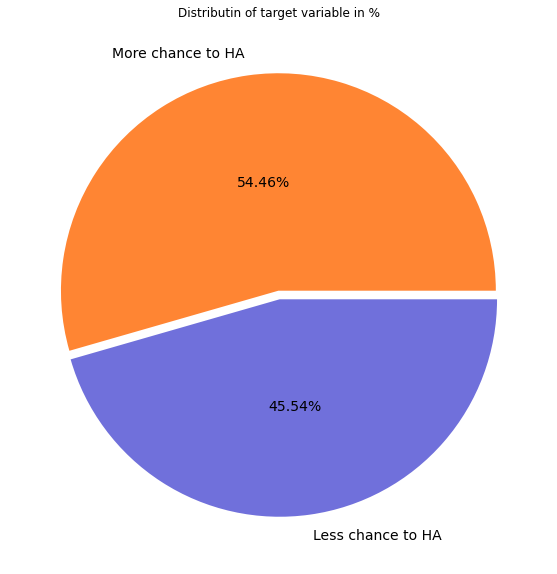

In [13]:
print(df['ProbHA'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['More chance to HA', 'Less chance to HA']
colors = ['#ff8533', '#7070db']
plt.pie(x = df['ProbHA'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distributin of target variable in %')
plt.show()

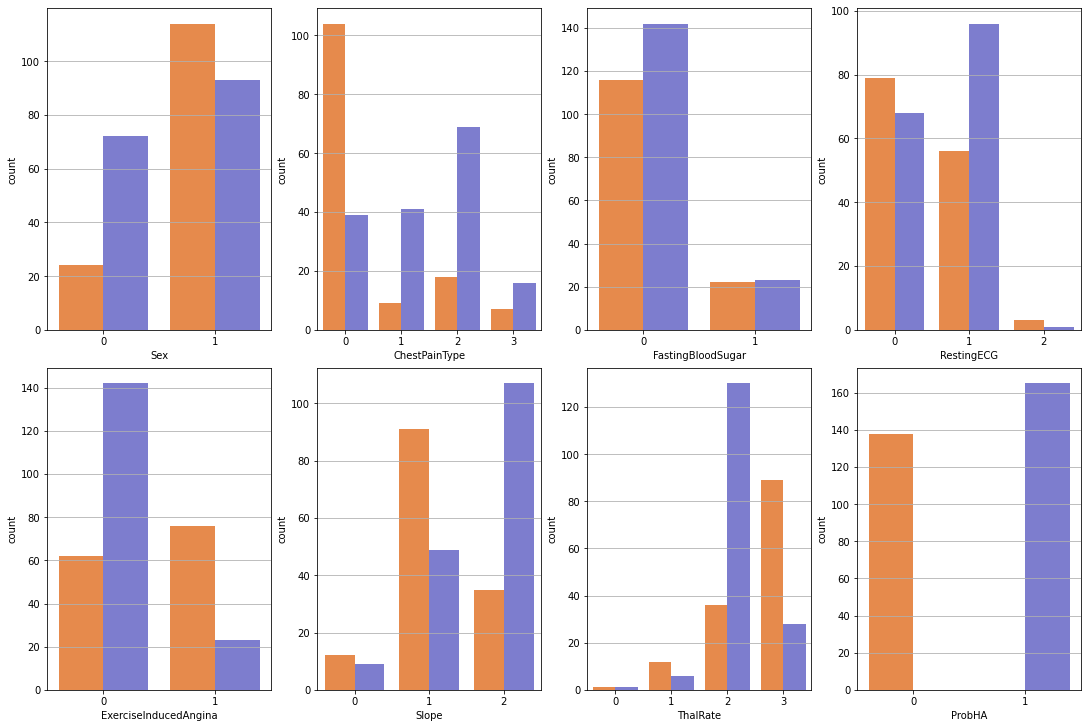

In [14]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
for i in df[categoricals]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=df, x=i, hue='ProbHA', palette = colors)
    ax.legend_.remove()
    plt.grid(axis='y')
    x+=1

Insights:

.The number of males that are more likely to have a HA from the number of total males is higher than females.

.The individuals who present a typical angina chest type are more likely to have a HA.

.The individuals with normal (0) resting electrocardiographic results (Resting ECG) appear to be more likely to suffer a HA.

.If angina is exercise induced, is more likely to suffer a HA.

.If the slope of the peak exercise ST segment is flat, is more likely to suffer a HA.

.If the thal rate is reversable defect, is more likely to suffer a HA.

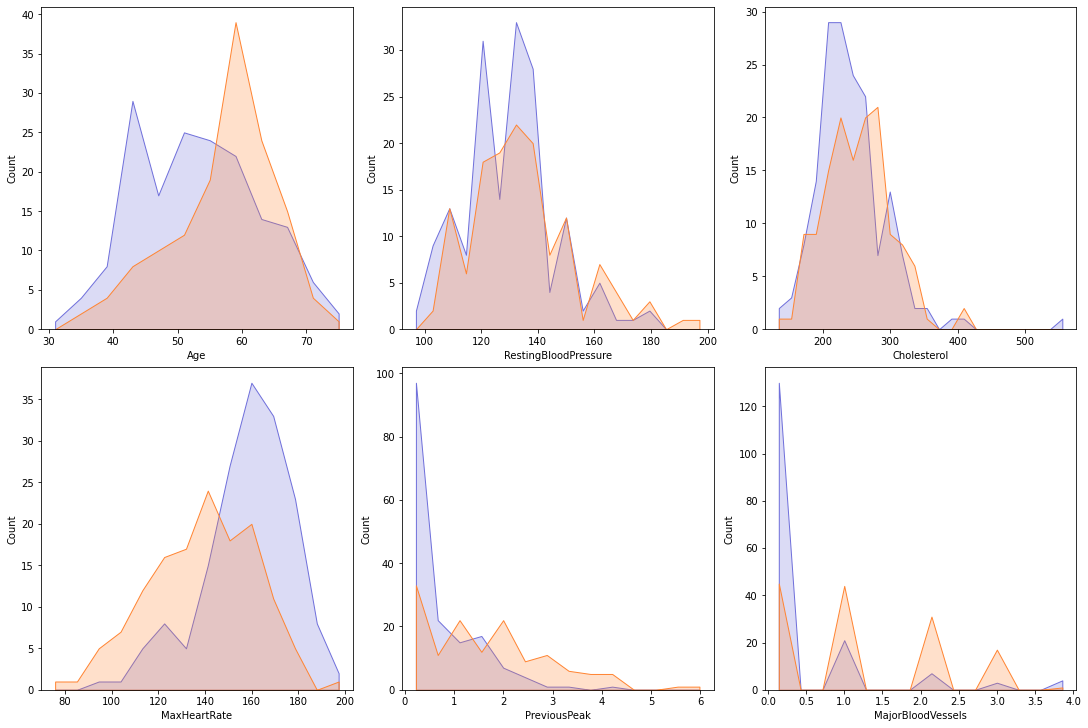

In [15]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
for i in df[numericals]:
    ax = plt.subplot(231+x)
    ax = sns.histplot(data=df, x=i, hue='ProbHA', palette=colors, element='poly')
    ax.legend_.remove()
    x+=1

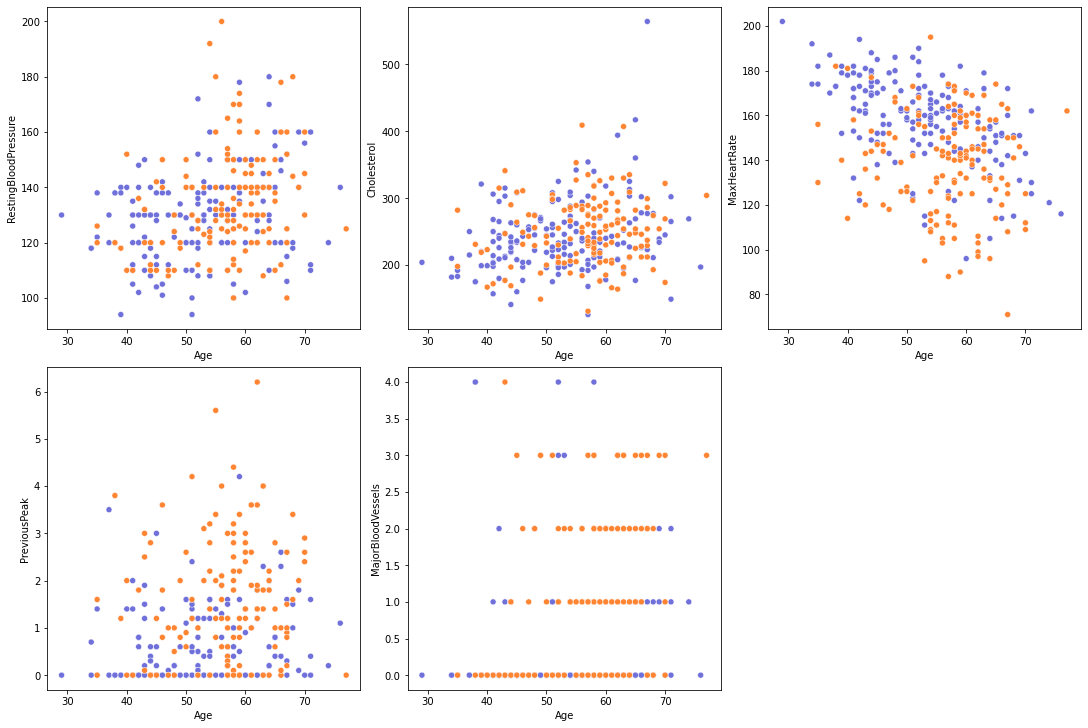

In [16]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
for i in df[numericals[1:]]:
    ax = plt.subplot(231+x)
    ax = sns.scatterplot(data=df, x='Age', y=i, hue='ProbHA', palette=colors)
    ax.legend_.remove()
    x+=1

<a id = '14' ></a>
##  Modelling


## The Gini Index 
The Gini Index or Gini Impurity is calculated by subtracting the sum of the squared probabilities of each class from one. 
It favours mostly the larger partitions and are very simple to implement. 
In simple terms, it calculates the probability of a certain randomly selected feature that was classified incorrectly.

The Gini Index varies between 0 and 1, where 0 represents purity of the classification and 1 denotes random distribution of elements among various classes. 
A Gini Index of 0.5 shows that there is equal distribution of elements across some classes.

In [17]:
df.shape

(303, 14)

We visualize the influence of gender on a heart attack:

<AxesSubplot:xlabel='Sex', ylabel='count'>

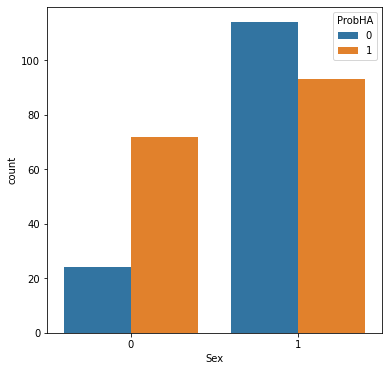

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x="Sex", data=df, hue="ProbHA")

Let's calculate the number of women 

In [19]:
n_femmes = df[df.Sex==0].shape[0]
print(n_femmes)

96


and the number of women without heart problems:

In [20]:
n_femmes_0 = df[(df.ProbHA==0) & (df.Sex==0)].shape[0]
print(n_femmes_0)

24


The probability of a woman in the dataset not having a heart problem is therefore :

In [21]:
p_femmes_0 = n_femmes_0/n_femmes
print(p_femmes_0)

0.25


Et la probabilité pour une femme dans le dataset d'avoir un problème cardiaque est :
And the probability for a woman in the dataset to have a heart problem is :

In [22]:
p_femmes_1 = 1 - p_femmes_0
print(p_femmes_1)

0.75


The Gini impurity index is $1-p_0^2-p_1^2$ :

In [23]:
gini_femmes = 1 - p_femmes_0**2 - p_femmes_1**2
print(gini_femmes)

0.375


We do the same calculations for men:

In [24]:
n_hommes = df[df.Sex==1].shape[0]
n_hommes_0 = df[(df.ProbHA==0) & (df.Sex==1)].shape[0]
p_hommes_0 = n_hommes_0/n_hommes
p_hommes_1 = 1-p_hommes_0
gini_hommes = 1 - p_hommes_0**2 - p_hommes_1**2
print(gini_hommes)

0.49485402226423014


The Gini index for the variable *sex* is a weighted average of the indices *gini_femmes* and *gini_hommes* :

In [25]:
gini_sex = gini_femmes*n_femmes/(n_femmes+n_hommes) + gini_hommes*n_hommes/(n_femmes+n_hommes)
print(gini_sex)

0.4568804706557612


## Decision Tree

To construct the decision tree, we choose the variable with the lowest Gini impurity as the root of the tree.  

The process is repeated recursively until the maximum depth of the tree is reached.

We visualize the tree for a maximum depth of 3 :

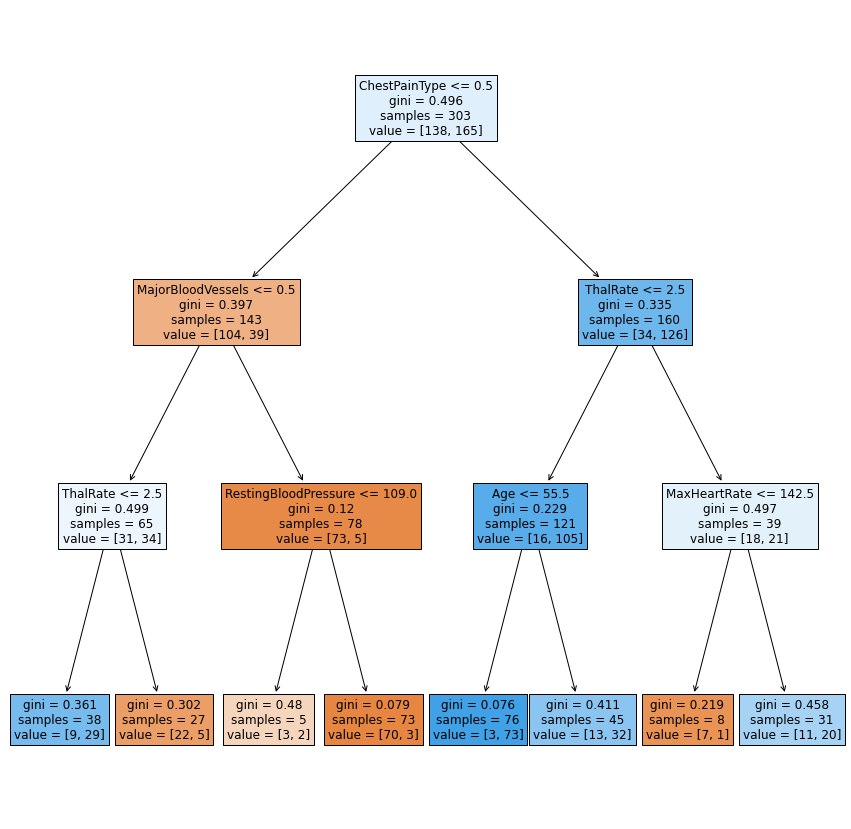

In [26]:
y = df["ProbHA"]
X = df.drop(["ProbHA"], axis=1)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(15,15))
fig = plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns)

You can also view the tree in a text format:

In [27]:
print(export_text(clf))

|--- feature_2 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_12 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  2.50
|   |   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- feature_3 <= 109.00
|   |   |   |--- class: 0
|   |   |--- feature_3 >  109.00
|   |   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_12 <= 2.50
|   |   |--- feature_0 <= 55.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  55.50
|   |   |   |--- class: 1
|   |--- feature_12 >  2.50
|   |   |--- feature_7 <= 142.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  142.50
|   |   |   |--- class: 1



# **Fitting and Comparing different Models**

We're going to try 4 different machine learning models:


1) Logistic Regression

2) Decision Tree Classifier

3) Random Forest Classifier

4) KNN

# Normalization

### Making features model ready

In [28]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# defining the features and target
X = df1.drop(['ProbHA'],axis=1)
y = df1[['ProbHA']]
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,PreviousPeak,Slope,MajorBloodVessels,ThalRate
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Train and test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


## Logistic Regression

In [30]:
best_accuracies_each_classes = {}
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_train = round(lr.score(X_train, y_train)*100,2) 
accuracy_lr_test = round(lr.score(X_test,y_test)*100,2)
best_accuracies_each_classes["Logistic Regression"] = lr.score(X_test,y_test)*100
print("Training Accuracy: {}%".format(accuracy_lr_train))
print("Testing Accuracy: {}%".format(accuracy_lr_test))

Training Accuracy: 86.36%
Testing Accuracy: 88.52%


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy of Linear Regreession is: 90.16%

## Decision Tree

In [31]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

best_accuracies_each_classes["Decision Tree"] = dt.score(X_test,y_test)*100
print("Accuracy of Decision Tree: {}%".format(dt.score(X_test,y_test)*100))

Accuracy of Decision Tree: 80.32786885245902%


In [32]:
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pkl.dump(dt, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

In [33]:
X_train.shape

(242, 13)

Test Accuracy of Decision Tree is: 72.13%

## Random Forest

In [34]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train,y_train)

best_accuracies_each_classes["Random Forest"] = rf.score(X_test,y_test)*100
print("Accuracy of  Random Forest is: {}%".format(rf.score(X_test,y_test)*100))


C:\Users\USER\AppData\Local\Temp\ipykernel_1104\933431906.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Accuracy of  Random Forest is: 86.88524590163934%


In [35]:
# Dump the trained random forest classifier with Pickle
decision_tree_pkl_filename = 'random_forest_classifier.pkl'
decision_tree_model_pkl.close()

Test Accuracy of Random Forest is: 83.60%

## KNN

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Best Test KNN Score accuracy is: 75.40983606557377%


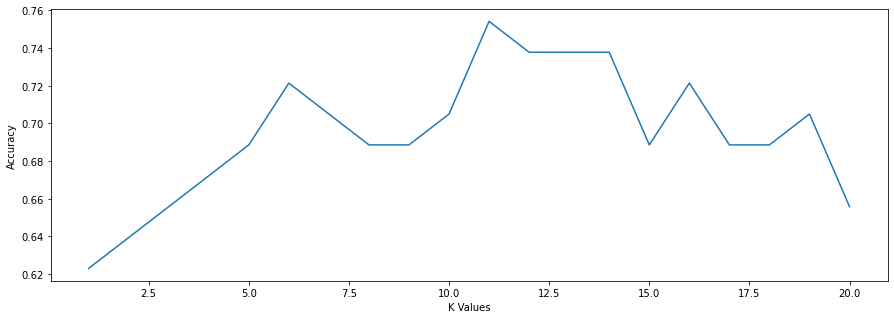

In [36]:
score_list_test = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    score_list_test.append(knn.score(X_test,y_test))
    
best_accuracies_each_classes["KNN"] = max(score_list_test)*100
print("Best Test KNN Score accuracy is: {}%".format(max(score_list_test)*100))

plt.figure(figsize=(15,5))
plt.plot(range(1,21),score_list_test)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

Test Accuracy of KNN is: 90.16%

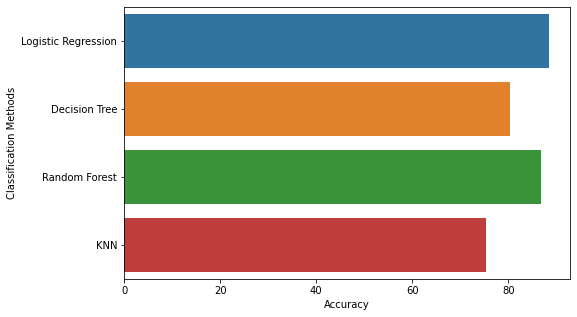

In [37]:
plt.figure(figsize=(8,5))
sns.barplot( y=list(best_accuracies_each_classes.keys()), x=list(best_accuracies_each_classes.values()))
plt.xlabel("Accuracy")
plt.ylabel("Classification Methods")
plt.show()

# Streamlit

# Import streamlit,pyngrok, and ngrok modules

In [38]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

# Write a file for creating web app

In [39]:
import streamlit as st
import base64
import sklearn
import numpy as np
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
#Load the saved model
#model=pkl.load(open("decision_tree_classifier.pkl","rb"))


st.set_page_config(page_title="Healthy Heart App",page_icon="⚕️",layout="centered",initial_sidebar_state="expanded")



def preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal):   
 
    
    # Pre-processing user input   
    if sex=="male":
        sex=1 
    else: sex=0
    
    
    if cp=="Typical angina":
        cp=0
    elif cp=="Atypical angina":
        cp=1
    elif cp=="Non-anginal pain":
        cp=2
    elif cp=="Asymptomatic":
        cp=3
    
    if exang=="Yes":
        exang=1
    elif exang=="No":
        exang=0
 
    if fbs=="Yes":
        fbs=1
    elif fbs=="No":
        fbs=0
 
    if slope=="Upsloping: better heart rate with excercise(uncommon)":
        slope=0
    elif slope=="Flatsloping: minimal change(typical healthy heart)":
          slope=1
    elif slope=="Downsloping: signs of unhealthy heart":
        slope=2  
 
    if thal=="fixed defect: used to be defect but ok now":
        thal=6
    elif thal=="reversable defect: no proper blood movement when excercising":
        thal=7
    elif thal=="normal":
        thal=2.31

    if restecg=="Nothing to note":
        restecg=0
    elif restecg=="ST-T Wave abnormality":
        restecg=1
    elif restecg=="Possible or definite left ventricular hypertrophy":
        restecg=2


    user_input=[age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal]
    user_input=np.array(user_input)


    return user_input

    

       
    # front end elements of the web page 
html_temp = """ 
    <div style ="background-color:pink;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Healthy Heart App</h1> 
    </div> 
    """
      
# display the front end aspect
st.markdown(html_temp, unsafe_allow_html = True) 
st.subheader('by Borchani Faten ')



st.sidebar.subheader("Data")
with st.sidebar:
    # following lines create boxes in which user can enter data required to make prediction
    age=st.selectbox ("Age",range(1,121,1))
    sex = st.radio("Select Gender: ", ('male', 'female'))
    cp = st.selectbox('Chest Pain Type',("Typical angina","Atypical angina","Non-anginal pain","Asymptomatic")) 
    trestbps=st.selectbox('Resting Blood Sugar',range(1,500,1))
    restecg=st.selectbox('Resting Electrocardiographic Results',("Nothing to note","ST-T Wave abnormality","Possible or definite left ventricular hypertrophy"))
    chol=st.selectbox('Serum Cholestoral in mg/dl',range(1,1000,1))
    fbs=st.radio("Fasting Blood Sugar higher than 120 mg/dl", ['Yes','No'])
    thalach=st.selectbox('Maximum Heart Rate Achieved',range(1,300,1))
    exang=st.selectbox('Exercise Induced Angina',["Yes","No"])
    oldpeak=st.number_input('Oldpeak')
    slope = st.selectbox('Heart Rate Slope',("Upsloping: better heart rate with excercise(uncommon)","Flatsloping: minimal change(typical healthy heart)","Downsloping: signs of unhealthy heart"))
    ca=st.selectbox('Number of Major Vessels Colored by Flourosopy',range(0,5,1))
    thal=st.selectbox('Thalium Stress Result',range(1,8,1))
    user_input=preprocess(age,sex,cp,trestbps,restecg,chol,fbs,thalach,exang,oldpeak,slope,ca,thal)
    
if st.button("Predict with DT"):    
    #exemple 
    model=pkl.load(open("decision_tree_classifier.pkl","rb"))
    user_input=user_input.reshape(1,-1)
    #user_input=scal.fit_transform(user_input)
    prediction = model.predict(user_input)

    if prediction[0] == 0:
        st.error('Warning! You have high risk of getting a heart attack!')

    else:
        st.success('You have lower risk of getting a heart disease!')
    

2022-12-07 18:24:30.055 
  command:

    streamlit run C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
